 <h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

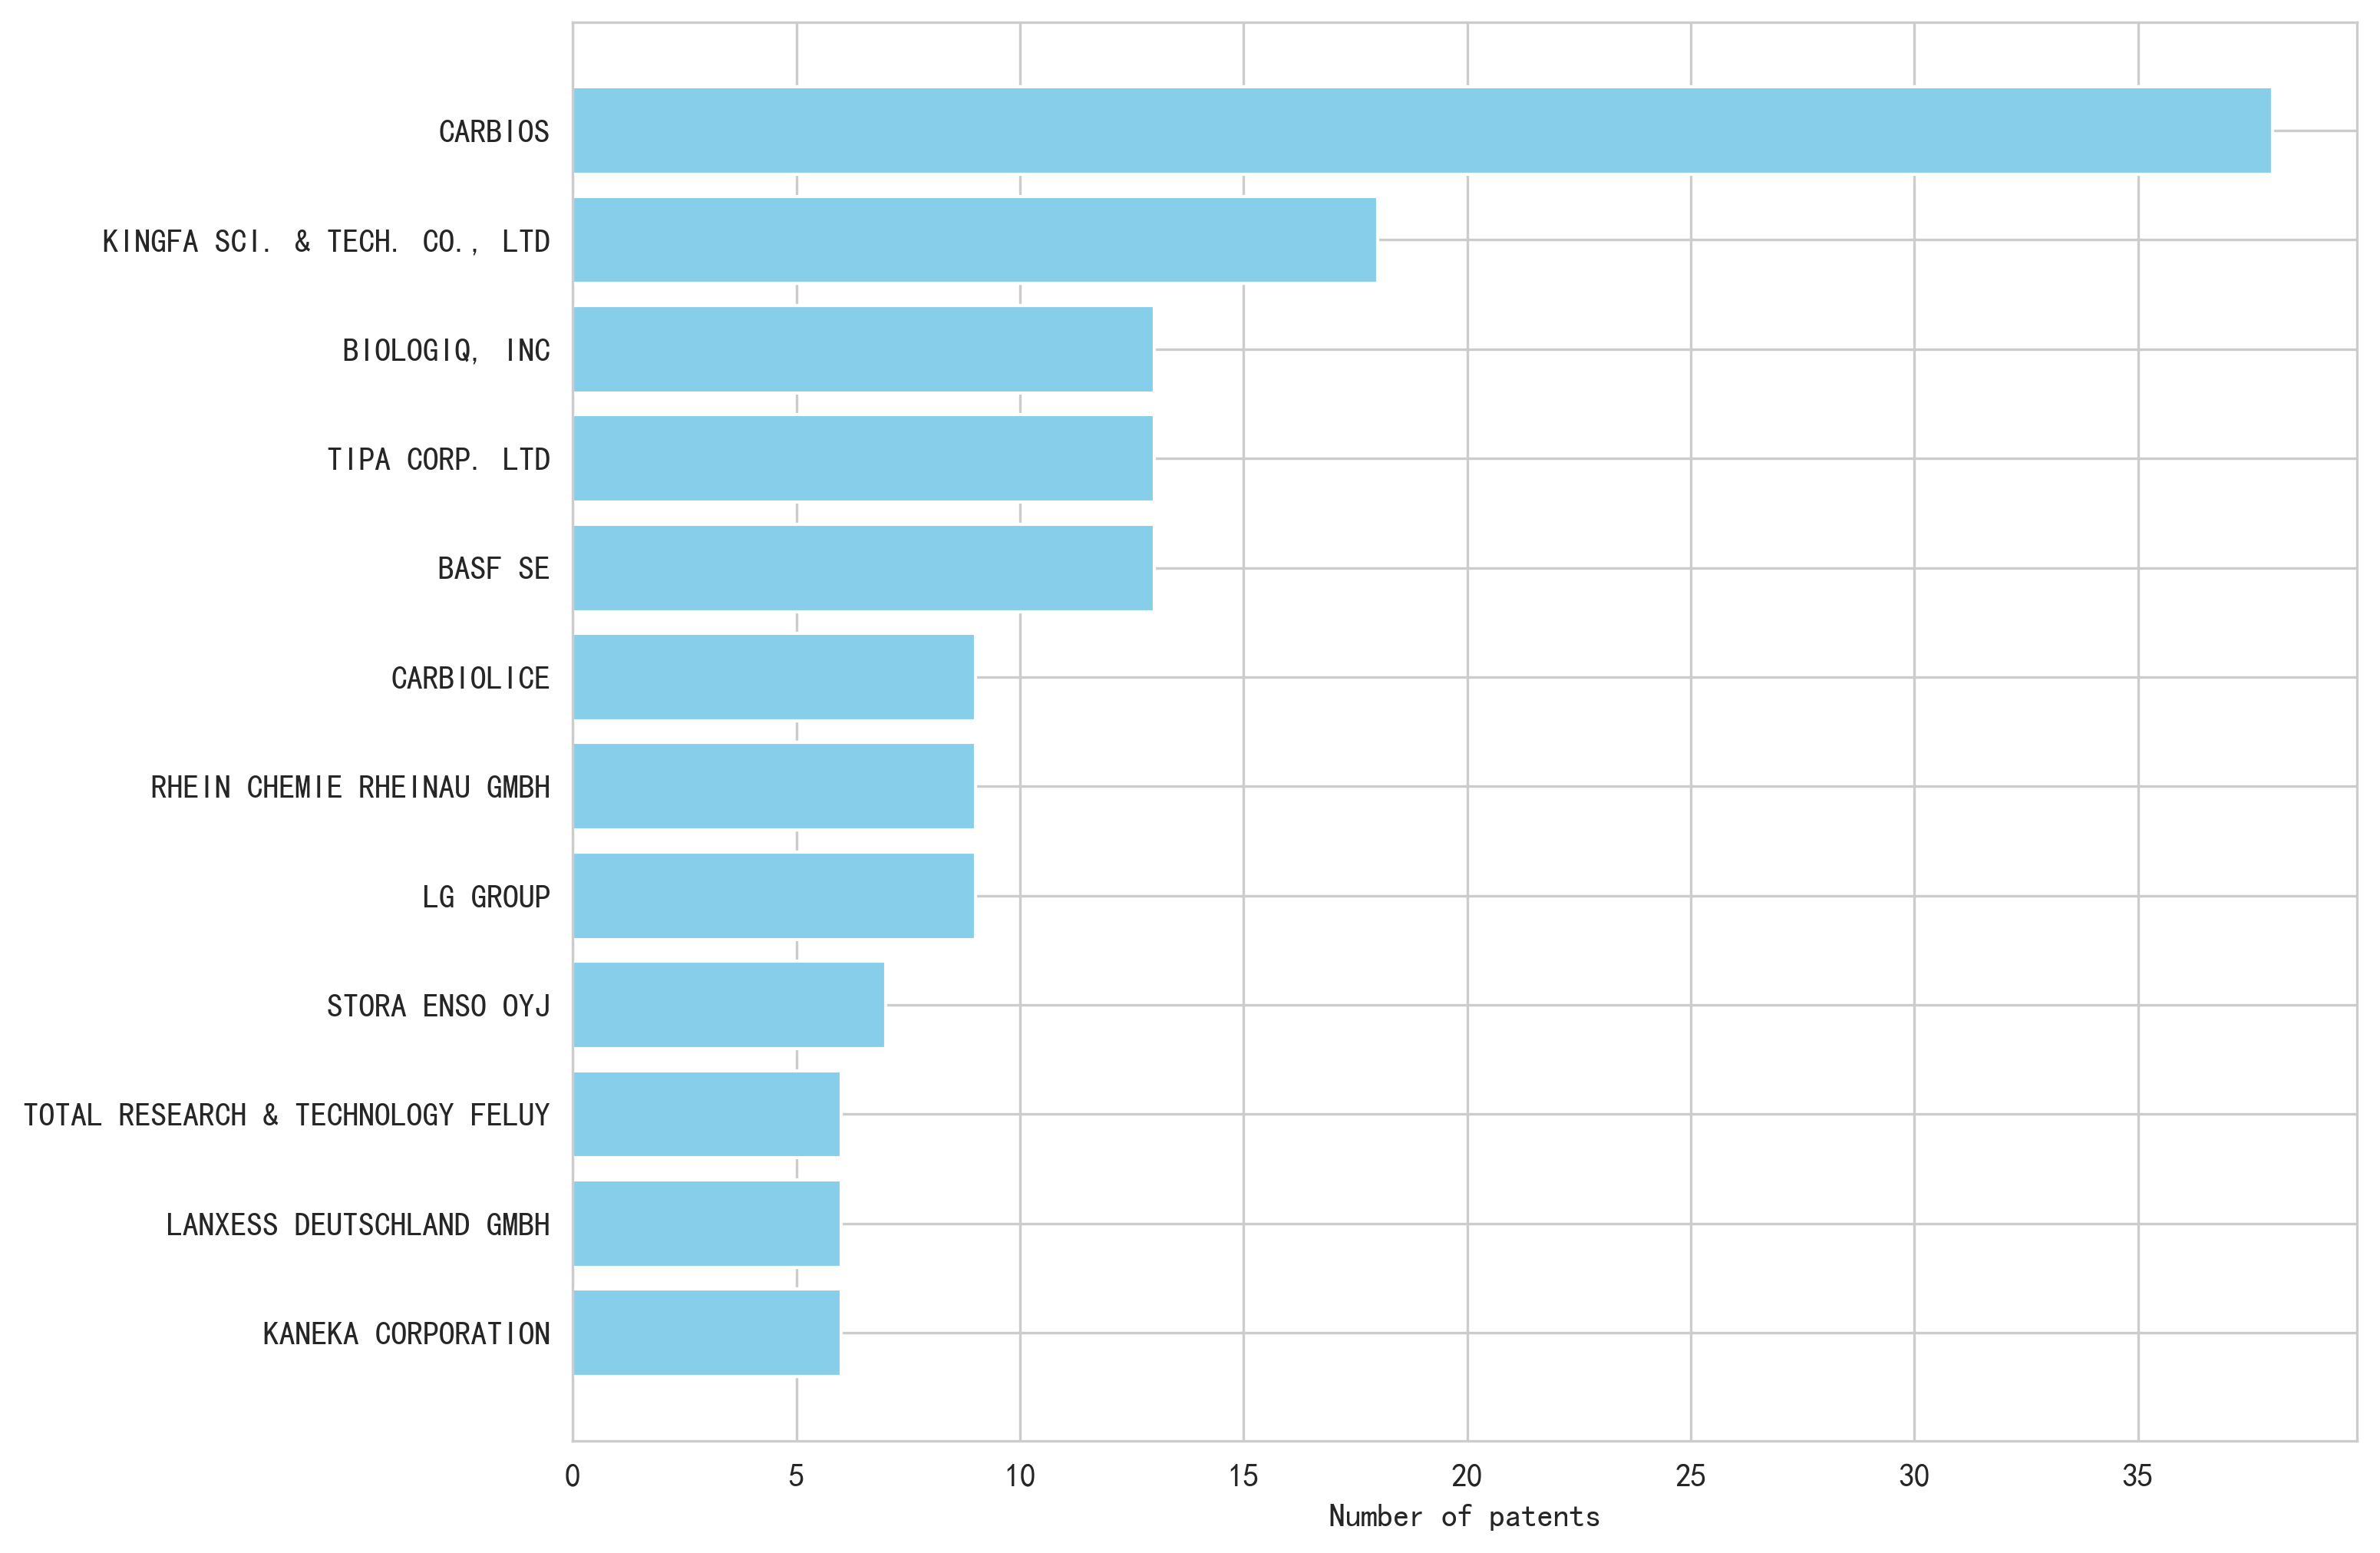

In [2]:
import matplotlib.pyplot as plt

# 专利权人中文名称及对应的专利数
data = {
    "CARBIOS": 38, 
    "BIOLOGIQ, INC": 13,
    "TIPA CORP. LTD": 13,
    "BASF SE": 13,
    "KINGFA SCI. & TECH. CO., LTD": 18,
    "CARBIOLICE": 9,
    "RHEIN CHEMIE RHEINAU GMBH": 9,
    "LG GROUP": 9,
    "STORA ENSO OYJ": 7,
    "TOTAL RESEARCH & TECHNOLOGY FELUY": 6,
    "LANXESS DEUTSCHLAND GMBH": 6,
    "KANEKA CORPORATION": 6
}

# 按专利数从多到少排序
sorted_data = dict(sorted(data.items(), key=lambda item: item[1], reverse=True))

# 创建条形图
plt.figure(figsize=(10, 8))
plt.xlabel('Number of patents')
plt.barh(list(sorted_data.keys()), list(sorted_data.values()), color='skyblue')
plt.gca().invert_yaxis()  # 反转Y轴，让条形图从上到下显示
plt.show()

In [3]:
from pyecharts import options as opts
from pyecharts.charts import Bar

# Data
data = {
    "CARBIOS": 38,
    "BIOLOGIQ, INC": 13,
    "TIPA CORP. LTD": 13,
    "BASF SE": 13,
    "KINGFA SCI.  \n & TECH. CO., LTD": 18,
    "CARBIOLICE": 9,
    "RHEIN CHEMIE  \n RHEINAU GMBH": 9,
    "LG GROUP": 9,
    "STORA  \n ENSO OYJ": 7,
    "TOTAL RESEARCH & \n  TECHNOLOGY FELUY": 6,
    "LANXESS  \n DEUTSCHLAND GMBH": 6,
    "KANEKA  \n CORPORATION": 6
}

# Sort data by value in descending order
sorted_data = sorted(data.items(), key=lambda item: item[1])

# Extract labels and values from sorted data
labels = [item[0] for item in sorted_data]
values = [item[1] for item in sorted_data]

# Create a bar chart
bar = (
    Bar()
    .add_xaxis(labels)
    .add_yaxis("", values, label_opts=opts.LabelOpts(position="right", font_size=10))  # 调整标签字体大小为10
    .reversal_axis()
    .set_series_opts(itemstyle_opts={"color": "skyblue"})
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Patents by Company"),
        yaxis_opts=opts.AxisOpts(name="Company", axislabel_opts=opts.LabelOpts(font_size=10)),
        xaxis_opts=opts.AxisOpts(name="Number of Patents", axislabel_opts=opts.LabelOpts(font_size=10)),

    )
)

# 设置图表的宽度和高度
bar.width = "1200px"
bar.height = "600px"

# Render the chart to an HTML file (optional)
bar.render("patents_by_company.html")

# Alternatively, render the chart directly in Jupyter Notebook
bar.render_notebook()

In [23]:
import pandas as pd
from pyecharts import options as opts
from pyecharts.charts import Map

# 国家缩写与数量的字典
countries_data = {
    'Australia': 2,
    'Belgium': 18,
    'Brazil': 3,
    'Canada': 22,
    'Switzerland': 6,
    'China': 61,
    'Germany': 42,
    'Denmark': 1,
    'Spain': 1,
    'Finland': 14,
    'France': 72,
    'United Kingdom': 16,
    'Israel': 16,
    'India': 1,
    'Italy': 11,
    'Japan': 16,
    'Korea': 32,
    'Luxembourg': 3,
    'Netherlands': 17,
    'New Zealand': 2,
    'Portugal': 1,
    'Seychelles': 1,
    'Sweden': 3,
    'Singapore': 1,
    'Thailand': 2,
    'Tunisia': 1,
    'Turkey': 1,
    'United States': 83
}

# 创建DataFrame
df_countries_data = pd.DataFrame(list(countries_data.items()), columns=['国家', '专利申请数'])

# 获取国家名称和数量信息
countries = df_countries_data['国家'].tolist()
quantities = df_countries_data['专利申请数'].tolist()

# 将国家名称和数量信息组合成元组列表
data_pair = [(countries[i], quantities[i]) for i in range(len(countries))]

# 找出专利申请数量前十的国家
top_10 = df_countries_data.nlargest(10, '专利申请数')['国家'].tolist()

# 使用 Map 组件绘制地图
# 使用 Map 组件绘制地图
import matplotlib.cm as cm

# 获取 Viridis 调色板的 RGB 值
viridis_colors = cm.get_cmap('YlGnBu', 5)

# 将 RGB 值转换为十六进制格式
world_map = (
    Map()
    .add("Number of patents", data_pair, maptype="world")
    .set_series_opts(
        label_opts=opts.LabelOpts(is_show=False, formatter=lambda x: f"{x.name}: {x.value}" if x.name in top_10 else "")
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Geographical distribution of patents"),
        visualmap_opts=opts.VisualMapOpts(max_=max(quantities), range_color=[f"#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}" for r, g, b, _ in viridis_colors(range(5))])
    )
)


# 显示地图
world_map.render_notebook()

/var/folders/90/4r531zmd0mv8fctppt5bqln00000gn/T/ipykernel_67890/4269886943.py:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis_colors = cm.get_cmap('YlGnBu', 5)
